## ENTROPY DATASET 2

### THIS ENTROPY DATASET 2 CONTAINS 206 VALUES AND 15 ATTRIBUTES

#### IMPORTING LIBRARIES

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

#### LOADING THE DATASET

In [139]:
df2 = pd.read_csv(r'C:\Users\swetha\Desktop\swe2.csv')

#### CHANGING THE ATTRIBUTE NAME

In [140]:
print(df2.shape)
df2.drop(["Subject ID","MRI ID"],axis=1,inplace=True)
df2.columns = ['Group','Visit','MR Delay','Gender','Dominant_Hand',
              'Age','Years_of_Education','Socioeconomic_Status','Mini_Mental_State_Examination',
              'Clinical_Dementia_Rating','Estimated_Total_Intracranial_Volume',
              'Normalize_Whole_Brain_Volume','Atlas_Scaling_Factor']
df2.head()

(206, 15)


,Group,Visit,MR Delay,Gender,Dominant_Hand,Age,Years_of_Education,Socioeconomic_Status,Mini_Mental_State_Examination,Clinical_Dementia_Rating,Estimated_Total_Intracranial_Volume,Normalize_Whole_Brain_Volume,Atlas_Scaling_Factor
0,Demented,1,0,F,R,87,14,1,30,0,1406,0.715,1.248
1,Demented,3,489,F,R,88,14,1,29,0,1398,0.713,1.255
2,Demented,1,0,M,R,80,20,1,29,0,1587,0.693,1.106
3,Demented,1,0,F,R,86,12,3,30,0,1430,0.718,1.227
4,Demented,2,446,F,R,88,12,3,30,0,1445,0.719,1.215


#### DESCRIBING THE DATA

In [141]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Visit,206.0,1.907767,0.970913,1.000,1.00000,2.0000,2.00000,5.000
MR Delay,206.0,625.548544,666.135506,0.000,0.00000,568.5000,1023.50000,2517.000
Age,206.0,77.155340,8.089448,60.000,71.00000,77.0000,83.00000,97.000
Years_of_Education,206.0,15.160194,2.704751,8.000,13.00000,16.0000,18.00000,23.000
Socioeconomic_Status,206.0,2.334951,1.049712,1.000,2.00000,2.0000,3.00000,5.000
Mini_Mental_State_Examination,206.0,29.223301,0.920573,25.000,29.00000,29.0000,30.00000,30.000
Clinical_Dementia_Rating,206.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
Estimated_Total_Intracranial_Volume,206.0,1486.859223,179.998630,1106.000,1355.00000,1462.0000,1596.75000,2004.000
Normalize_Whole_Brain_Volume,206.0,0.740451,0.037350,0.644,0.71525,0.7390,0.76875,0.837
Atlas_Scaling_Factor,206.0,1.197107,0.140572,0.876,1.09950,1.2005,1.29600,1.587


#### CORRELATION

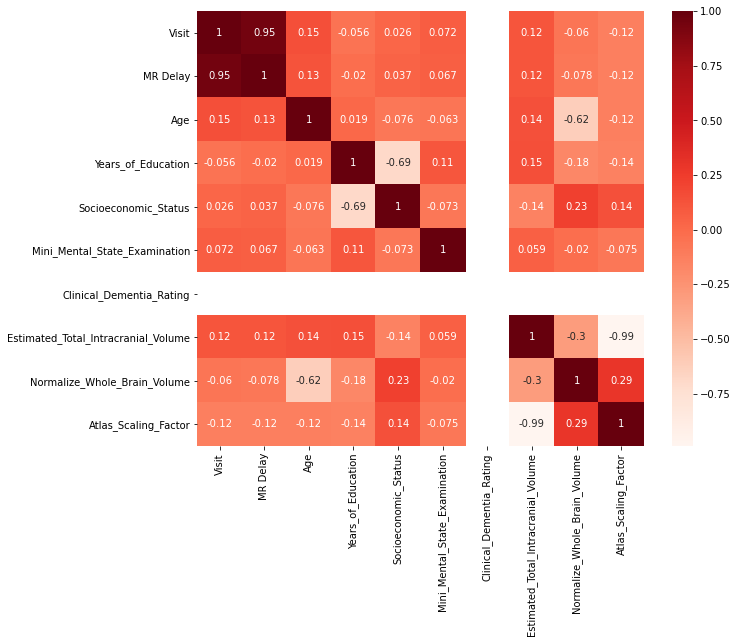

In [142]:
plt.figure(figsize=(10,8))
cor = df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [143]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


#### CONVERTING CATEGORICAL DATA INTO NUMERICAL DATA

In [144]:
import category_encoders as ce
df2['Group'] = df2['Group'].replace(['Converted'], ['Demented']) 
encoder= ce.OrdinalEncoder(cols=['Group'],return_df=True,
                           mapping=[{'col':'Group',
'mapping':{'Demented':1,'Nondemented':0}}])

for column in df2.columns:
    le = LabelEncoder()
    df2[column] = le.fit_transform(df2[column])
df2.head()

,Group,Visit,MR Delay,Gender,Dominant_Hand,Age,Years_of_Education,Socioeconomic_Status,Mini_Mental_State_Examination,Clinical_Dementia_Rating,Estimated_Total_Intracranial_Volume,Normalize_Whole_Brain_Volume,Atlas_Scaling_Factor
0,0,0,0,0,0,27,4,0,5,0,67,31,105
1,0,2,13,0,0,28,4,0,4,0,63,30,109
2,0,0,0,1,0,20,9,0,4,0,127,16,48
3,0,0,0,0,0,26,2,2,5,0,71,34,100
4,0,1,7,0,0,28,2,2,5,0,78,35,93


### PREPARING THE DATA FOR MACHINE LEARNING MODELS

In [145]:
from pandas import read_csv
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [146]:
feature_col_names = ["Gender",
              "Age","Years_of_Education","Socioeconomic_Status","Mini_Mental_State_Examination",
              "Clinical_Dementia_Rating","Estimated_Total_Intracranial_Volume",
              "Normalize_Whole_Brain_Volume","Atlas_Scaling_Factor"]
predicted_class_names = ['Group']
X = df2[feature_col_names].values
y = df2[predicted_class_names].values

#### NORMALIZATION(NORMALIZER METHOD)

In [147]:
normalized = Normalizer().fit(X).transform(X)
print("ORIGINAL DATA: \n\n", df2.values)
print("\nNORMALIZED DATA: \n\n", normalizedX[0:6,:])

ORIGINAL DATA: 

 [[  0   0   0 ...  67  31 105]
 [  0   2  13 ...  63  30 109]
 [  0   0   0 ... 127  16  48]
 ...
 [  1   0   0 ...  27  97 144]
 [  1   1  48 ...  30  95 141]
 [  1   2  96 ...  33  97 138]]

NORMALIZED DATA: 

 [[0.         0.20560429 0.03045989 0.         0.03807487 0.
  0.51020323 0.23606418 0.79957223]
 [0.         0.2112621  0.0301803  0.         0.0301803  0.
  0.47533972 0.22635225 0.82241317]
 [0.00721932 0.14438646 0.06497391 0.         0.02887729 0.
  0.916854   0.11550917 0.3465275 ]
 [0.         0.19996451 0.01538189 0.01538189 0.03845471 0.
  0.54605692 0.26149205 0.76909426]
 [0.         0.2161856  0.01544183 0.01544183 0.03860457 0.
  0.60223132 0.270232   0.71804504]
 [0.         0.06365724 0.03472213 0.         0.01157404 0.
  0.10995341 0.44560066 0.88541429]]


#### STANDARDIZATION(NORMAL DISTRIBUTION)

In [148]:
standardization = StandardScaler().fit(X).transform(X) 
print("ORIGINAL DATA: \n\n", df2.values)
print("\nSTANDARIZED DATA: \n\n",standardization[0:6,:])

ORIGINAL DATA: 

 [[  0   0   0 ...  67  31 105]
 [  0   2  13 ...  63  30 109]
 [  0   0   0 ... 127  16  48]
 ...
 [  1   0   0 ...  27  97 144]
 [  1   1  48 ...  30  95 141]
 [  1   2  96 ...  33  97 138]]

STANDARIZED DATA: 

 [[-0.67134509  1.22230579 -0.44381095 -1.27482968  0.84576804  0.
  -0.40222823 -0.79823186  0.38761086]
 [-0.67134509  1.34640387 -0.44381095 -1.27482968 -0.24315831  0.
  -0.48332343 -0.83503485  0.47106823]
 [ 1.48954691  0.35361927  1.55236931 -1.27482968 -0.24315831  0.
   0.8141997  -1.35027672 -0.80165665]
 [-0.67134509  1.09820772 -1.24228306  0.63509697  0.84576804  0.
  -0.32113304 -0.68782289  0.28328915]
 [-0.67134509  1.34640387 -1.24228306  0.63509697  0.84576804  0.
  -0.17921645 -0.6510199   0.13723876]
 [-0.67134509 -0.7632634   0.35466115 -1.27482968 -2.42101101  0.
  -1.37537058  0.89470572  1.3890993 ]]


#### BINARIZATION(TRANSFORM DATA INTO 1 OR 0)

In [149]:
binarizer = Binarizer (threshold = 0.5).fit(X)
binary = binarizer.transform(X)
print("ORIGINAL DATA:\n\n", df2.values)
print("\nBINARIZED Data:\n\n", binary[0:5,:])

ORIGINAL DATA:

 [[  0   0   0 ...  67  31 105]
 [  0   2  13 ...  63  30 109]
 [  0   0   0 ... 127  16  48]
 ...
 [  1   0   0 ...  27  97 144]
 [  1   1  48 ...  30  95 141]
 [  1   2  96 ...  33  97 138]]

BINARIZED Data:

 [[0 1 1 0 1 0 1 1 1]
 [0 1 1 0 1 0 1 1 1]
 [1 1 1 0 1 0 1 1 1]
 [0 1 1 1 1 0 1 1 1]
 [0 1 1 1 1 0 1 1 1]]


### FEATURE SELECTION

#### UNIVARIATE SELECTION

In [150]:
best_variable = SelectKBest (score_func = chi2, k = 5)
features = best_variable.fit(X, y).transform(X)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', features.shape[1])
print('Features:', features)

Original number of features: 9
Reduced number of features: 5
Features: [[ 27   0  67  31 105]
 [ 28   0  63  30 109]
 [ 20   0 127  16  48]
 ...
 [  1   1  27  97 144]
 [  3   1  30  95 141]
 [  5   1  33  97 138]]


#### Recursive Elimination of Attributes (RFE)

In [151]:
model = LogisticRegression()
rfe = RFE (model, 3) 
fit = rfe.fit(X, y)
print("Predictor Variables:", df2.columns[0:8])
print("Selected Variables: %s" % fit.support_)
print("Attribute Ranking: %s" % fit.ranking_)
print("Number of Best Attributes: %d" % fit.n_features_)

Predictor Variables: Index(['Group', 'Visit', 'MR Delay', 'Gender', 'Dominant_Hand', 'Age',
       'Years_of_Education', 'Socioeconomic_Status'],
      dtype='object')
Selected Variables: [False False  True  True  True False False False False]
Attribute Ranking: [2 6 1 1 1 7 5 4 3]
Number of Best Attributes: 3


#### Principal Component Analysis (PCA)¶

In [152]:
scaler = MinMaxScaler(feature_range = (0, 1))
rescaled = scaler.fit_transform(X) 
pca = PCA(n_components = 4)
fit = pca.fit (rescaled)
print("Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Variance: [0.47311869 0.18600051 0.13057313 0.10138101]
[[ 7.65920472e-01  4.82879230e-02  8.14125434e-02 -6.92247425e-02
   1.45046440e-03 -6.77626358e-21  4.33155986e-01 -1.69928977e-01
  -4.27915845e-01]
 [ 3.21323458e-01 -2.33875406e-01 -5.45423947e-01  6.25952526e-01
  -7.54377706e-02 -0.00000000e+00 -9.97009471e-02  3.56235404e-01
   1.01068713e-01]
 [ 2.17622256e-01 -5.90375010e-01  4.02608961e-01 -3.27702530e-01
   4.61930483e-02  0.00000000e+00 -1.16136406e-01  5.52844981e-01
   1.15567912e-01]
 [ 4.95394136e-01  2.00652307e-01  9.84148033e-02 -9.98817308e-02
  -1.54982767e-01 -0.00000000e+00 -5.35402792e-01 -3.21828486e-01
   5.29539504e-01]]


### APPLYING MACHINE LEARNING ALGORITHMS¶

In [153]:
from sklearn.model_selection import train_test_split

feature_col_names = ["Gender",
              "Age","Years_of_Education","Socioeconomic_Status","Mini_Mental_State_Examination",
              "Clinical_Dementia_Rating","Estimated_Total_Intracranial_Volume",
              "Normalize_Whole_Brain_Volume","Atlas_Scaling_Factor"]
predicted_class_names = ['Group']
X = df2[feature_col_names].values
y = df2[predicted_class_names].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [154]:
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Nondemented','Demented']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [155]:
def report_performance(model):
    model_test = model.predict(X_test)
    print("\n\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    plot_confusion_metrix(y_test, model_test)
    print("\n\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))


In [156]:
total_fpr = {}
total_tpr = {}
def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)
    total_fpr[str((str(model).split('(')[0]))] = fpr
    total_tpr[str((str(model).split('(')[0]))] = tpr
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [157]:
total_accuracy = {}
def accuracy(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    total_accuracy[str((str(model).split('(')[0]))] = accu
 

#### FEATURE SCALING

In [158]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### HYPERPARAMETER OPTIMIZATION(RANDOMIZEDSEARCHCV)

#### LOGISTIC REGRESSION

{'tol': 1.6346824879133965e-07, 'solver': 'liblinear', 'max_iter': 58, 'fit_intercept': True, 'C': 1.4}



Confusion Matrix:
[[ 0  4]
 [ 0 58]]


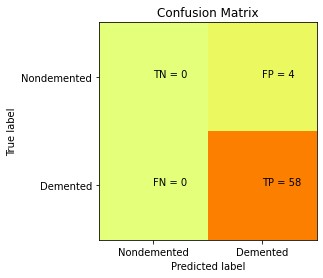




Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.94      1.00      0.97        58

    accuracy                           0.94        62
   macro avg       0.47      0.50      0.48        62
weighted avg       0.88      0.94      0.90        62



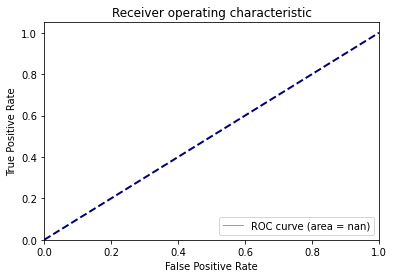


Acuuracy Of the Model:  0.9354838709677419 




In [159]:
from sklearn.model_selection import RandomizedSearchCV
lr_params = {'tol': list(np.logspace(np.log(1e-5), np.log(1e-2), num = 20, base = 10)),
             'C': list(np.linspace(0.1, 2.0, 20)),
             'fit_intercept': [True, False],
             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'max_iter': list(range(1, 200))
            }
n_iter_search=50
clf = LogisticRegression()
logreg_rs = RandomizedSearchCV(clf, param_distributions=lr_params,n_iter=n_iter_search,cv=5,scoring='accuracy')
logreg_rs.fit(X_train, y_train)      
print(logreg_rs.best_params_)
report_performance(logreg_rs)
roc_curves(logreg_rs)
accuracy(logreg_rs)



#### RANDOMFOREST CLASSIFIER

{'criterion': 'gini', 'max_depth': 45, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 7}



Confusion Matrix:
[[ 0  4]
 [ 1 57]]


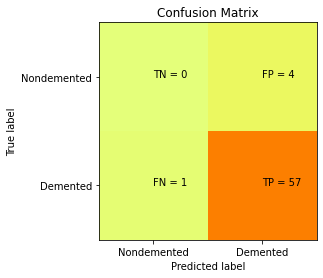




Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.93      0.98      0.96        58

    accuracy                           0.92        62
   macro avg       0.47      0.49      0.48        62
weighted avg       0.87      0.92      0.90        62



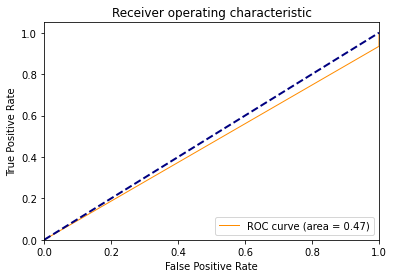


Acuuracy Of the Model:  0.9193548387096774 




In [171]:
from scipy.stats import randint as sp_randint
from random import randrange as sp_randrange
from sklearn.model_selection import RandomizedSearchCV

rf_params = {
   'n_estimators': sp_randint(1,10),
    "max_features":sp_randint(1,30),
    'max_depth': sp_randint(5,50),
    "min_samples_split":sp_randint(2,11),
    "min_samples_leaf":sp_randint(1,11),
    "criterion":['gini','entropy']
}
n_iter_search=50
clf = RandomForestClassifier(random_state=0)
rfc_rs = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=5,scoring='accuracy')
rfc_rs.fit(X_train, y_train)
print(rfc_rs.best_params_)
report_performance(rfc_rs)
roc_curves(rfc_rs)
accuracy(rfc_rs)





#### SVM CLASSIFIER

{'tol': 1.8086425869893873e-09, 'max_iter': 88, 'kernel': 'poly', 'gamma': 'auto', 'degree': 5, 'C': 0.9}



Confusion Matrix:
[[ 0  4]
 [ 0 58]]


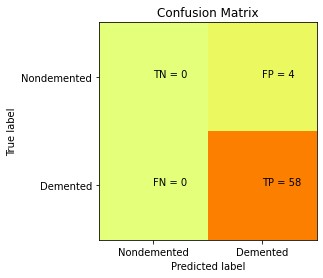




Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.94      1.00      0.97        58

    accuracy                           0.94        62
   macro avg       0.47      0.50      0.48        62
weighted avg       0.88      0.94      0.90        62



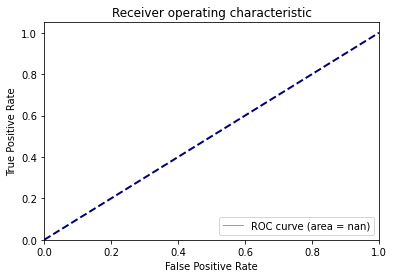


Acuuracy Of the Model:  0.9354838709677419 




In [161]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
sv_params = {'C': list(np.linspace(0.1, 5.0, 50)),
             'kernel': ['linear', 'poly'],
             'degree': list(range(2, 8)),
             'gamma': ['auto', 'scale'],
             'tol': list(np.logspace(np.log(1e-5), np.log(1e-2), num = 50, base = 20)),
             'max_iter': list(range(-1, 300))
            }
n_iter_search=50
clf = SVC()
svm_rs = RandomizedSearchCV(clf, param_distributions=sv_params,n_iter=n_iter_search,cv=5,scoring='accuracy')
svm_rs.fit(X_train, y_train)
print(svm_rs.best_params_)
report_performance(svm_rs) 
roc_curves(svm_rs)
accuracy(svm_rs)

#### DECISION TREE CLASSIFIER

{'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 4}



Confusion Matrix:
[[ 0  4]
 [ 3 55]]


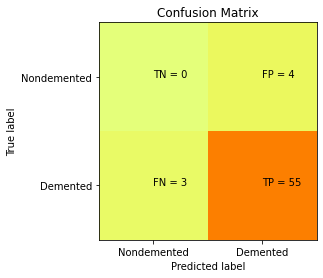




Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.93      0.95      0.94        58

    accuracy                           0.89        62
   macro avg       0.47      0.47      0.47        62
weighted avg       0.87      0.89      0.88        62



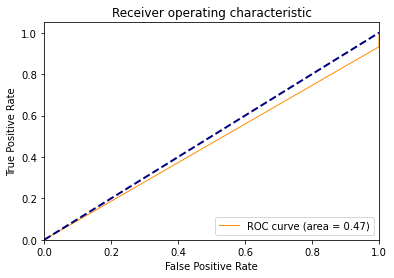


Acuuracy Of the Model:  0.8870967741935484 




In [162]:
from scipy.stats import randint 
param_dist = {

              "max_features": ['auto', 'sqrt', 'log2'],

              "min_samples_leaf": randint(1, 5), 

              "criterion": ["gini", "entropy"]} 

n_iter_search=50
clf = DecisionTreeClassifier() 
dfc_rs = RandomizedSearchCV(clf, param_distributions=param_dist,n_iter=n_iter_search,cv=5,scoring='accuracy')
dfc_rs.fit(X_train, y_train)
print(dfc_rs.best_params_)
report_performance(dfc_rs) 
roc_curves(dfc_rs)
accuracy(dfc_rs)


#### XGB CLASSIFIER

{'verbosity': 0, 'subsample': 0.8, 'min_child_weight': 1, 'max_depth': 1, 'gamma': 1.5, 'colsample_bytree': 0.6}



Confusion Matrix:
[[ 0  4]
 [ 0 58]]


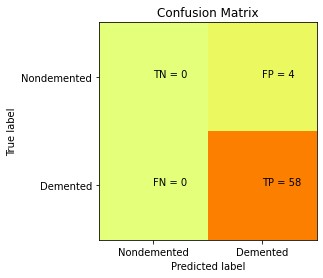




Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.94      1.00      0.97        58

    accuracy                           0.94        62
   macro avg       0.47      0.50      0.48        62
weighted avg       0.88      0.94      0.90        62



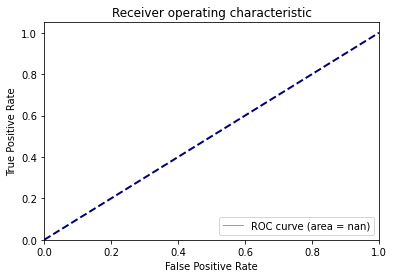


Acuuracy Of the Model:  0.9354838709677419 




In [163]:
param_xgb = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [1,2,3],
        'verbosity': [0]
        }
n_iter_search=50
clf = XGBClassifier(random_state=0)
xgb_rs = RandomizedSearchCV(clf, param_distributions=param_xgb,n_iter=n_iter_search,cv=5,scoring='accuracy')
xgb_rs.fit(X_train, y_train)
print(xgb_rs.best_params_)
report_performance(xgb_rs) 
roc_curves(xgb_rs)
accuracy(xgb_rs)


#### KNN CLASSIFIER

{'n_neighbors': 5, 'leaf_size': 1}



Confusion Matrix:
[[ 0  4]
 [ 0 58]]


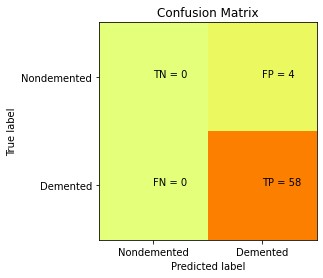




Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.94      1.00      0.97        58

    accuracy                           0.94        62
   macro avg       0.47      0.50      0.48        62
weighted avg       0.88      0.94      0.90        62



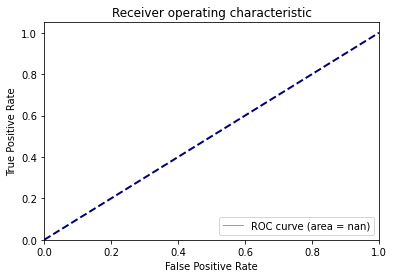


Acuuracy Of the Model:  0.9354838709677419 




In [164]:
param_knn = {
    'n_neighbors': range(1,10),
    'leaf_size': range(1,5),
   
}
n_iter_search=50
clf = KNeighborsClassifier()
knn_rs = RandomizedSearchCV(clf, param_distributions=param_knn,n_iter=n_iter_search,cv=3,scoring='accuracy')
knn_rs.fit(X_train, y_train)
print(knn_rs.best_params_)
report_performance(knn_rs) 
roc_curves(knn_rs)
accuracy(knn_rs)

#### NAIVE BAYAS CLASSIFIER

{'var_smoothing': 0.4714866363457394}



Confusion Matrix:
[[ 0  4]
 [ 0 58]]


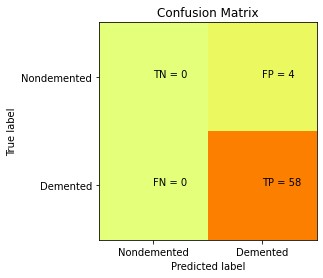




Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.94      1.00      0.97        58

    accuracy                           0.94        62
   macro avg       0.47      0.50      0.48        62
weighted avg       0.88      0.94      0.90        62



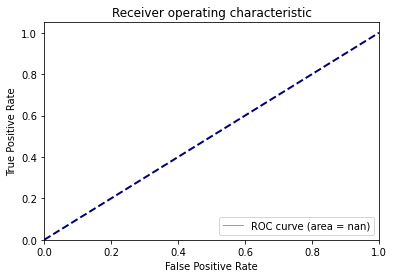


Acuuracy Of the Model:  0.9354838709677419 




In [165]:
param_nb= {
    'var_smoothing': np.logspace(0,-1)
}
n_iter_search=50
clf = GaussianNB()
nb_rs = RandomizedSearchCV(clf, param_distributions=param_nb,n_iter=n_iter_search,cv=5,scoring='accuracy')
nb_rs.fit(X_train, y_train)
print(nb_rs.best_params_)
report_performance(nb_rs) 
roc_curves(nb_rs)
accuracy(nb_rs)



#### EXTRA TREE CLASSIFIER

{'max_depth': 18, 'n_estimators': 128}



Confusion Matrix:
[[ 2  2]
 [ 1 57]]


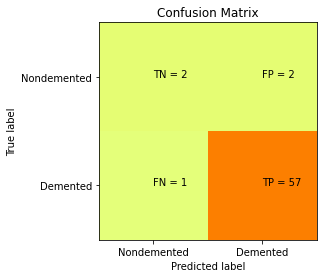




Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.97      0.98      0.97        58

    accuracy                           0.95        62
   macro avg       0.82      0.74      0.77        62
weighted avg       0.95      0.95      0.95        62



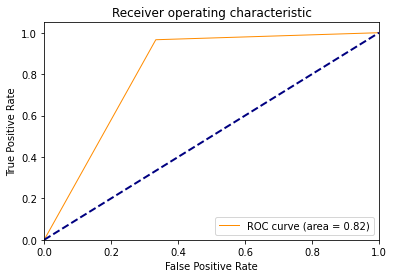


Acuuracy Of the Model:  0.9516129032258065 




In [166]:
param_etc={
           'n_estimators': sp_randint(1,200),
'max_depth': sp_randint(5,20)
    }   
n_iter_search=50
clf =ExtraTreesClassifier()
etc_rs = RandomizedSearchCV(clf, param_distributions=param_etc,n_iter=n_iter_search,cv=5,scoring='accuracy')
etc_rs.fit(X_train, y_train)
print(etc_rs.best_params_)
report_performance(etc_rs) 
roc_curves(etc_rs)
accuracy(etc_rs)

#### GRADIENTBOOSTING CLASSIFIER

{'min_samples_split': 11, 'min_samples_leaf': 16}



Confusion Matrix:
[[ 1  3]
 [ 0 58]]


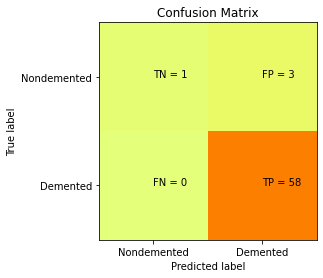




Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.95      1.00      0.97        58

    accuracy                           0.95        62
   macro avg       0.98      0.62      0.69        62
weighted avg       0.95      0.95      0.94        62



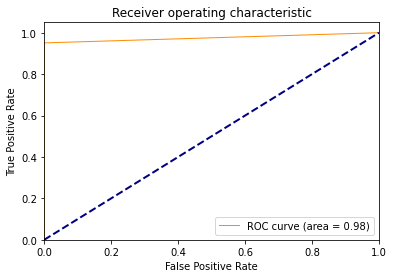


Acuuracy Of the Model:  0.9516129032258065 




In [167]:
param_gb = {'min_samples_split':range(1,20,10), 
               'min_samples_leaf':range(1,20,5)
              }


n_iter_search=50
clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10)
gbc_rs = RandomizedSearchCV(clf, param_distributions=param_gb,n_iter=n_iter_search,cv=5,scoring='accuracy')
gbc_rs.fit(X_train, y_train)
print(gbc_rs.best_params_)
report_performance(gbc_rs) 
roc_curves(gbc_rs)
accuracy(gbc_rs)



#### ADABOOST CLASSIFIER

{'n_estimators': 3, 'learning_rate': 0.6900000000000001, 'base_estimator__max_features': 'sqrt'}



Confusion Matrix:
[[ 1  3]
 [ 3 55]]


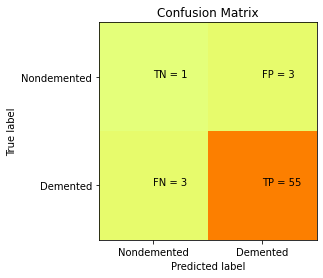




Classification Report: 
              precision    recall  f1-score   support

           0       0.25      0.25      0.25         4
           1       0.95      0.95      0.95        58

    accuracy                           0.90        62
   macro avg       0.60      0.60      0.60        62
weighted avg       0.90      0.90      0.90        62



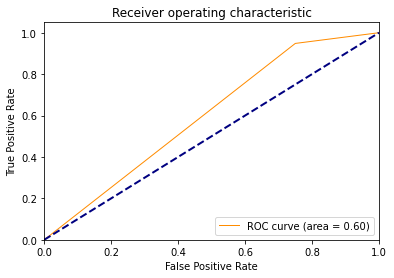


Acuuracy Of the Model:  0.9032258064516129 




In [168]:
stump_clf =  DecisionTreeClassifier(random_state=42, max_depth=10)
param_ad = {
              "base_estimator__max_features": ['auto', 'sqrt', 'log2'],
              "n_estimators": list(range(1,50)),
              "learning_rate": np.linspace(0.01, 1, num=100),
             }
n_iter_search=50
clf = AdaBoostClassifier(base_estimator = stump_clf)
abc_rs = RandomizedSearchCV(clf, param_distributions=param_ad,n_iter=n_iter_search,cv=5,scoring='accuracy')
abc_rs.fit(X_train, y_train)
print(abc_rs.best_params_)
report_performance(abc_rs) 
roc_curves(abc_rs)
accuracy(abc_rs)
